In [1]:
using Plots, LinearAlgebra

## Exercise 1

Write a program to solve the boundary value problem for the nonlinear pendulum as discussed in the text. See if you can find yet another solution for the boundary conditions illustrated in Figures 2.4 and 2.5.

In [13]:
function nl_pendulum(α, β, T, m, θ0; max_iter = 4)
    h = T / (m + 1)
    
    θ = θ0
    for iter in 1:max_iter
        θ += J_nl_pendulum(θ,h) \ (-1 * G_nl_pendulum(θ, h, α, β)) 
    end
    
    return θ
end

function J_nl_pendulum(θ, h)
    # Compute Jacobian for discretized non-linear pendulum
    m = length(θ)
    J = (1/h^2) * Tridiagonal( ones(m-1), 
                    [-2 + h^2 * cos(θ_i) for θ_i in θ],
                    ones(m-1))
    return J
end
    
function G_nl_pendulum(θ, h, α, β)
    # Computes discretized pendulum RHS
    # u'' + sin = 0
    
    m = length(θ)
    G = zeros(m)
        
    # Using intitial condition theta_0 = alpha
    G[1] = (1/h^2)*(α - 2*θ[1] + θ[2]) + sin(θ[1])
        
    # Discretized equations
    for i in 2:(m-1)
        G[i] = (1/h^2)*(θ[i-1] - 2*θ[i] + θ[i+1]) + sin(θ[i])
    end
        
    # Using intitial condtion theta_(m+1) = beta
    G[m] = (1/h^2)*(θ[m-1] - 2*θ[m] + β) + sin(θ[m])
        
    return G
end

G_nl_pendulum (generic function with 1 method)

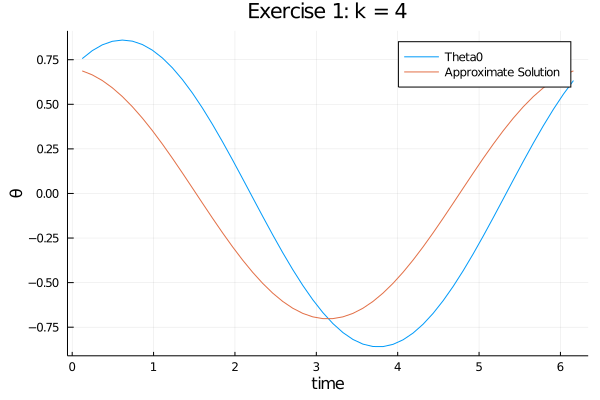

In [14]:
m = 50
T = 2π
α = 0.7
β = 0.7
t = [T*i/(m + 1) for i in 1:m]
theta0 = [0.7 * cos(ti) + 0.5 * sin(ti) for ti in t]

test_sol = nl_pendulum(α, β, T, m, theta0; max_iter = 4)

plot(t, theta0, 
    label = "Theta0",
    ylabel = "θ",
    xlabel = "time")
plot!(t, test_sol,
    label = "Approximate Solution",
    title = "Exercise 1: k = 4")

Trying different initial values to search for more solutions. Random sampling of coefficients for sin and cosine,

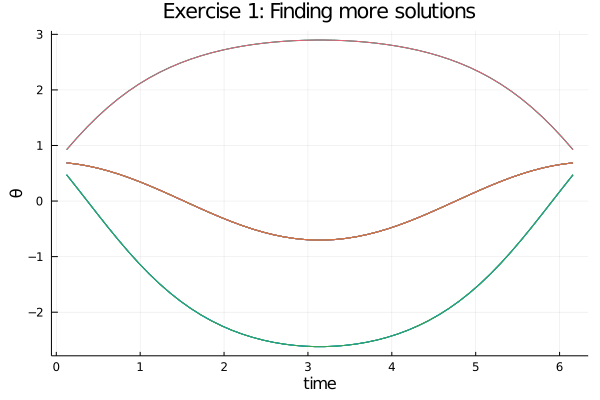

In [16]:
theta0 = randn() .+ [sin(4*ti) for ti in t]
test_sol = nl_pendulum(α, β, T, m, theta0; max_iter = 20)

plot(t, test_sol,
    label = false,
    title = "Exercise 1: Finding more solutions",
    ylabel = "θ",
    xlabel = "time")

# ADDING A COUPLE MORE GUESSES
for i in 2:19
    theta0 = randn() .+ [sin(4*ti) for ti in t]
    test_sol = nl_pendulum(α, β, T, m, theta0; max_iter = 30)
    plot!(t, test_sol,
        label = false)
end

plot!()

In [17]:
savefig("../hw/figs/hw-3-exer1-more-sol.png")

(b) Find a numerical solution to this BVP with the same general behavior as seen in Figure 2.5 for the case of a longer time interval, say, $T = 20$, again with $\alpha = \beta = 0.7$. Try larger values of $T$. What does $\max_i \theta_i$ approach as $T$ is increased? Note that for large $T$ this solution exhibits “boundary layers”.

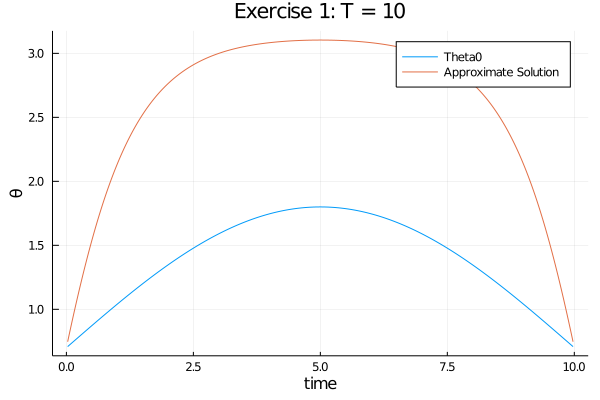

In [18]:
m = 400
T = 10
t = [T*i/(m + 1) for i in 1:m]

theta0 = [0.7 + 1.1 * sin(π*ti/T) for ti in t]

test_sol = nl_pendulum(α, β, T, m, theta0; max_iter = 300)

plot(t, theta0, 
    label = "Theta0",
    ylabel = "θ",
    xlabel = "time")
exerT10 = plot!(t, test_sol,
    label = "Approximate Solution",
    title = "Exercise 1: T = $T")

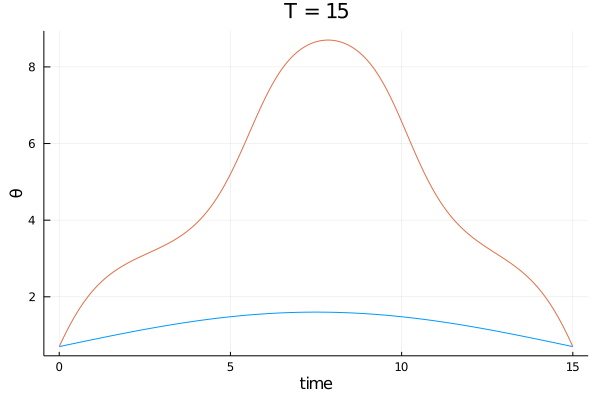

In [19]:
m = 10000
T = 15
t = [T*i/(m + 1) for i in 1:m]

theta0 = [0.7 + 0.9 * sin(π*ti/T) for ti in t]

test_sol = nl_pendulum(α, β, T, m, theta0; max_iter = 300)

plot(t, theta0, 
    label = false,
    ylabel = "θ",
    xlabel = "time")
exerT15 = plot!(t, test_sol,
    label = false,
    title = "T = $T")

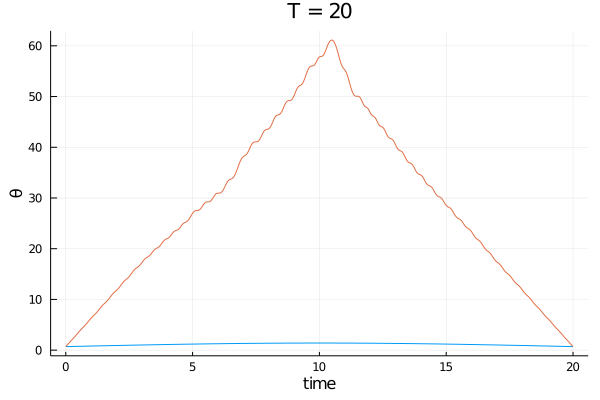

In [23]:
m = 10000
T = 20
t = [T*i/(m + 1) for i in 1:m]

theta0 = [0.7 + 0.7 * sin(π*ti/T) for ti in t]

test_sol = nl_pendulum(α, β, T, m, theta0; max_iter = 300)

plot(t, theta0, 
    label = false,
    ylabel = "θ",
    xlabel = "time")
exerT20 = plot!(t, test_sol,
    label = false,
    title = "T = $T")

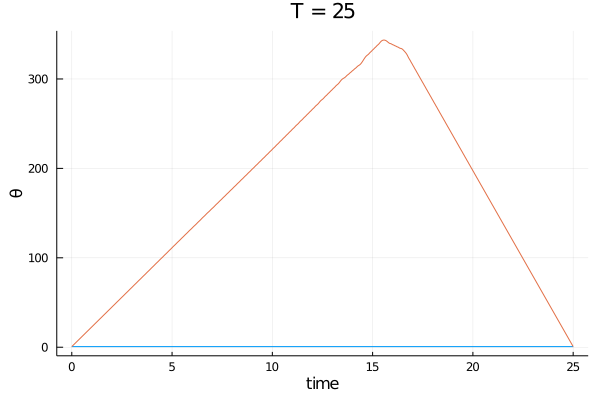

In [24]:
m = 30000
T = 25
t = [T*i/(m + 1) for i in 1:m]

theta0 = [0.7 + 0.0 * sin(π*ti/T) for ti in t]

test_sol = nl_pendulum(α, β, T, m, theta0; max_iter = 300)

plot(t, theta0, 
    label = false,
    ylabel = "θ",
    xlabel = "time")
exerT25 = plot!(t, test_sol,
    label = false,
    title = "T = $T")

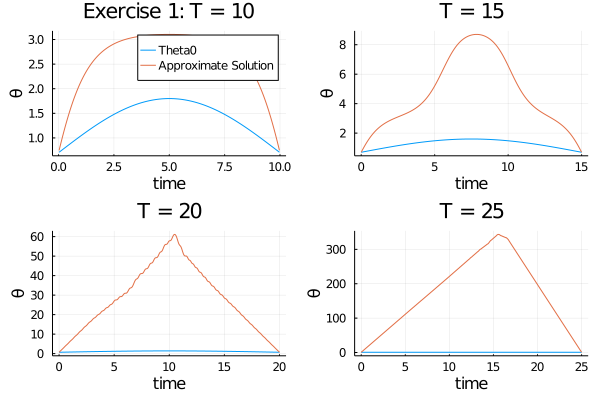

In [25]:
exer1_plot = plot(exerT10, exerT15, exerT20, exerT25)

In [26]:
savefig("../hw/figs/hw-3-max-theta.png")

From these, it appears that $\max \theta_i$ approaches infinity as $T$ increases.

## Exercise 3

In [27]:
function make_matrix(M)
   # Step size
   h = 1/M
    
    # Xjs of interest
    xjs = [j*h for j in 1:M]
    
    # Defining diagonal
    diagA = [ -(1 + (xj + h/2)^2) - (1 + (xj - h/2 )^2)  for xj in xjs]
    diagB = [  (1 + (xj + h/2)^2)  for xj in xjs[1:M-1]]
    
    ##Building Matrix
    A = Array(Tridiagonal(diagB, diagA, diagB))
    A[end, [M, M-1, M-2]] .= 3*h/2, -2*h, h/2
    A = A ./ h^2 
    
    return A
end

# Define test function
u(x) = (1 - x)^2

# Define true solution for test function
true_f(x) = 2*(3*x^2 - 2*x + 1)

true_f (generic function with 1 method)

In [28]:
function get_u_approx(f, M)
    h = 1/M
    
    F = [f(i*h) for i in 1:M]
    F[1] -= 1/h^2
    F[end] = 0
    
    U = make_matrix(M) \ F
end

M = 10
U = get_u_approx(true_f, M)

10-element Array{Float64,1}:
  0.8079841743268176
  0.6384038660262153
  0.4887606987439885
  0.35905391456816127
  0.24928604326889642
  0.15946196247245417
  0.089587892006819
  0.03967053825490476
  0.009716480061949168
 -0.00026820600236936225

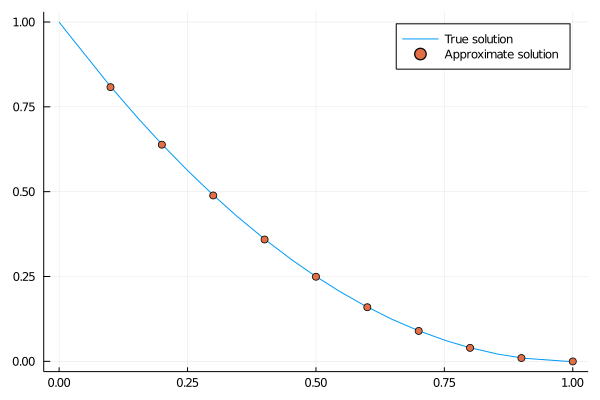

In [29]:
plot(u, 0, 1,
    label = "True solution")
scatter!([i/M for i in 1:M], U,
    label = "Approximate solution")

In [30]:
# Applying Richardson Extrapolation
M = 10

U10 = get_u_approx(true_f, M)
U20 = get_u_approx(true_f, 2*M)

RE = similar(U10)
for i in 1:length(U10)
    # Same grid point is at 2i in finer grid/
   RE[i] = (4*U20[2*i] - U10[i])/(4 - 1) 
end

In [31]:
function get_infinity_error(uhat)
    M = length(uhat)
    
    # Discretize True Solution
    xjs = [j/M for j in 1:M]
    true_u_val = u.(xjs)    
    
    # Infinity norm
    return maximum( abs.(true_u_val .- uhat) )
end

function get_L2_error(uhat)
    M = length(uhat)
    
    # Discretize True Solution
    xjs = [j/M for j in 1:M]
    true_u_val = u.(xjs)    
    
    # Infinity norm
    return sqrt(sum((1/M)*(true_u_val .- uhat).^2))
end

get_L2_error (generic function with 1 method)

In [32]:
U10_error = get_infinity_error(U10)

0.002015825673182481

In [33]:
U20_error = get_infinity_error(U20)

0.0005635871159848094

In [34]:
RE_error = get_infinity_error(RE)

9.544184155884283e-6

In [390]:
function guess_f(u, M)
    h = 1 / M
    
    # Discretize u
    xjs = [j*h for j in 1:M]
    U = u.(xjs)
    
    # Approximate the F vector
    F_approx = make_matrix(M)*U
    
    # End points will be funky due to boundary conditions
    
    ## First end point has extra term
    F_approx[1] += (1+ (h/2)^2)/h^2
    
    ## Last is a derivative and isn't needed 
    return F_approx[1:(M-1)]
end


guess_f (generic function with 1 method)

## Exercise 4


In [35]:
function nl_exer_4_nm(α, β, a, b, ϵ, m, U0; max_iter = 1)
    h = (b - a) / (m + 1)
    
    U = U0
    for iter in 1:max_iter
        U += J_exer_4(U, h, ϵ, α, β) \ (-1 * G_exer_4(U, h, α, β, ϵ)) 
    end
    
    return U
end

function J_exer_4(U, h, ϵ, α, β)
    # Compute Jacobian for discretized 
    m = length(U)
    
    # Upper Off-Diagonal
    JUpper = [ϵ/h^2 + U[i]/(2*h) for i in 1:(m-1)]
    
    JDiag = zeros(m)
    
    # Diagonal
    JDiag[1] = -2*ϵ/h^2 + (U[2] - α)/(2*h) - 1
    JDiag[2:(m-1)] .= [-2*ϵ/h^2 + (U[i+1] - U[i-1])/(2*h) - 1 for i in 2:(m-1)]
    JDiag[m] = -2*ϵ/h^2 + (β - U[m-1])/(2*h) - 1

    # Lower Off-Diagonal
    JLower = [ϵ/h^2 - U[i]/(2*h) for i in 2:m]

    return Tridiagonal(JLower, JDiag, JUpper)
end
    
function G_exer_4(U, h, α, β, ϵ)
    # Computes discretized ...
    
    m = length(U)
    G = zeros(m)
        
    # Using intitial condition U_0 = alpha
    G[1] = ϵ*(α - 2*U[1] + U[2])/(h^2) + U[1]*((U[2] - α)/(2*h) - 1)    
        
    # Discretized equations
    for i in 2:(m-1)
        G[i] = ϵ*(U[i-1] - 2*U[i] + U[i+1])/(h^2) + U[i]*((U[i+1] - U[i-1])/(2*h) - 1)    
    end
        
    # Using intitial condtion U_(m+1) = beta
    G[m] = ϵ*(U[m-1] - 2*U[m] + β)/(h^2) + U[m]*((β - U[m-1])/(2*h) - 1)    
        
    return G
end

G_exer_4 (generic function with 1 method)

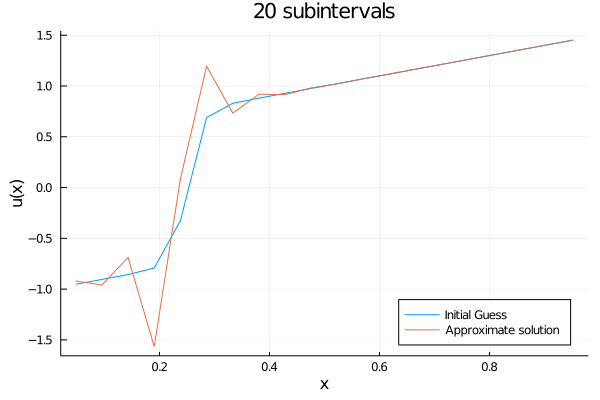

In [36]:
a = 0
b = 1
α = -1
β = 1.5
ϵ = 0.01
m = 20

x = [(b-a)*i/(m+1) for i in 1:m]
xbar = (1/2)*(a + b - α - β)
w0 = (1/2)*(a - b + β - α)

U0 = [xi - xbar + w0*tanh(w0*(xi - xbar)/(2*ϵ)) for xi in x]
test_sol = nl_exer_4_nm(α, β, a, b, ϵ, m, U0; max_iter = 10)

plot(x, U0,
    label = "Initial Guess",
    xlabel = "x",
    ylabel = "u(x)",
    title = "$m subintervals",
    legend = :bottomright)
exer4_20 = plot!(x, test_sol,
    label = "Approximate solution")

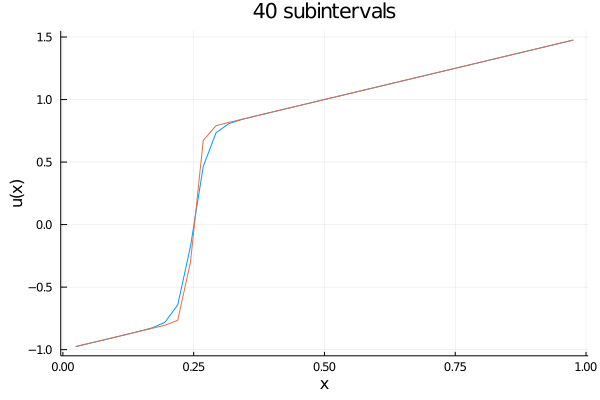

In [37]:
m = 40

x = [(b-a)*i/(m+1) for i in 1:m]
xbar = (1/2)*(a + b - α - β)
w0 = (1/2)*(a - b + β - α)

U0 = [xi - xbar + w0*tanh(w0*(xi - xbar)/(2*ϵ)) for xi in x]
test_sol = nl_exer_4_nm(α, β, a, b, ϵ, m, U0; max_iter = 10)

plot(x, U0,
    label = false,
    xlabel = "x",
    ylabel = "u(x)",
    title = "$m subintervals")
exer4_40 = plot!(x, test_sol,
    label = false)

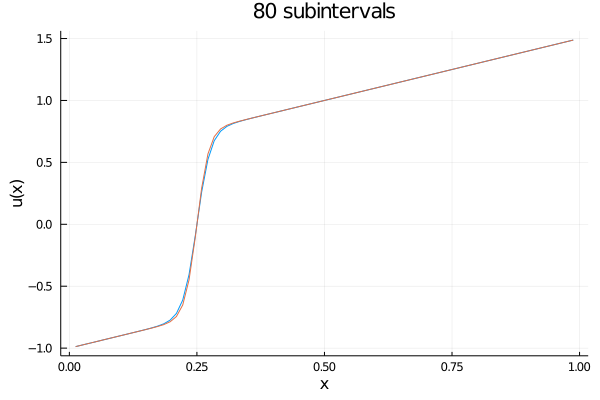

In [38]:
m = 80

x = [(b-a)*i/(m+1) for i in 1:m]
xbar = (1/2)*(a + b - α - β)
w0 = (1/2)*(a - b + β - α)

U0 = [xi - xbar + w0*tanh(w0*(xi - xbar)/(2*ϵ)) for xi in x]
test_sol = nl_exer_4_nm(α, β, a, b, ϵ, m, U0; max_iter = 10)

plot(x, U0,
    label = false,
    xlabel = "x",
    ylabel = "u(x)",
    title = "$m subintervals")
exer4_80 = plot!(x, test_sol,
    label = false)

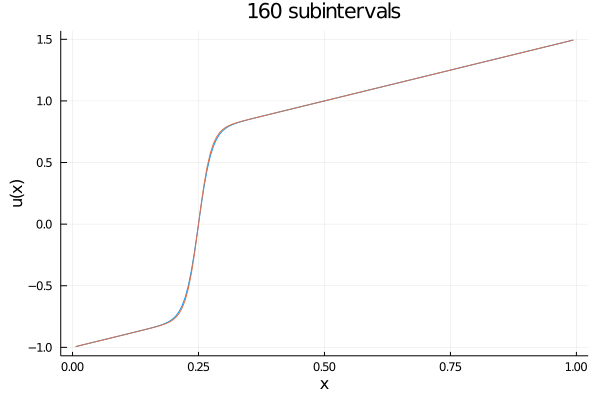

In [39]:
m = 160

x = [(b-a)*i/(m+1) for i in 1:m]
xbar = (1/2)*(a + b - α - β)
w0 = (1/2)*(a - b + β - α)

U0 = [xi - xbar + w0*tanh(w0*(xi - xbar)/(2*ϵ)) for xi in x]
test_sol = nl_exer_4_nm(α, β, a, b, ϵ, m, U0; max_iter = 10)

plot(x, U0,
    label = false,
    xlabel = "x",
    ylabel = "u(x)",
    title = "$m subintervals")
exer4_160 = plot!(x, test_sol,
    label = false)

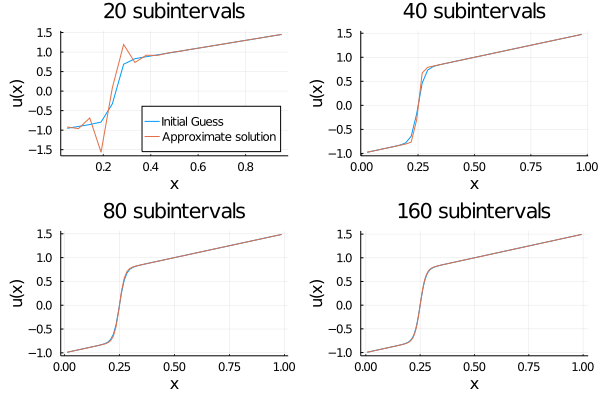

In [40]:
exer4_plot = plot( exer4_20, exer4_40, exer4_80, exer4_160)

In [41]:
savefig("../hw/figs/hw-3-exer-4.png")